In [2]:
import pandas as pd #Data Frames
import numpy as np  #Basic Math Commands
import matplotlib.pyplot as plt #Plot!
from tabulate import tabulate # Make Pretty tables
nicered = "#E6072A" ;niceblu = "#424FA4" ;nicegrn = "#6DC048" # colors for graphs
#import data set into R like data frame
burea = pd.read_csv('burea_subset.csv')
burea.columns = (['x','y','res','perm']) # easy column names
print burea[1:5] # print some data 

    x   y     res    perm
1  15  60  249.17  489.67
2  15  75  243.93  457.78
3  18  27  249.13  360.07
4  18  84  247.02  473.68


In [3]:
#Calculate Covariance: Expects two Vvctors of equal length
def covariance(x, y):
    m_x = np.mean(x) # Mean X
    m_y = np.mean(y) # Mean Y
    N = len(x) # Convert to float
    if N != len(y): 
        print "Warning: Covariance cannot be calculated on series of unequal length"
    cov = 0
    for (x_i, y_i) in zip(x,y):
        cov += (x_i - m_x)*(y_i - m_y) # summation of product of deviation from means
    return (1.0 / (N)) * cov # Degrees of freedom
    

In [4]:
#Calculate Pearson's Correlation Coefficient
#Covariance of two vectors over product of standard deviations
def pearsonr(x, y, ddof=1):
    std_x = np.std(x, ddof=ddof) #calculate standard deviations, using built in formula 
    std_y = np.std(y, ddof=ddof) #set degrees of freedom to 1 to line up with matlab
    return covariance(x,y) / (std_x * std_y)

#### 1) Scatterplot for resisitivity and permeability

Pearson's Correlation coefficient  -0.41955222651
Covariance  -90.3066521843


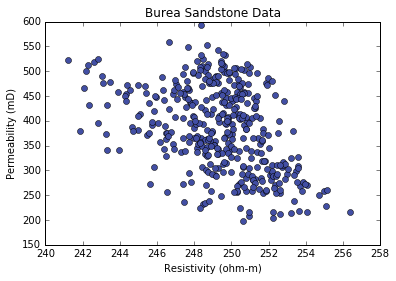

In [5]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(burea['res'],burea['perm'], "o", color=niceblu)
ax.set_xlabel("Resistivity (ohm-m)")
ax.set_ylabel("Permeability (mD)")
ax.set_title("Burea Sandstone Data", fontsize=12)
plt.hold
rho = pearsonr(burea['res'],burea['perm'])
print "Pearson's Correlation coefficient ", rho
print "Covariance ", covariance(burea['res'],burea['perm'])

In [6]:
#calculates the distance between two vector based points
#using a given theta

def distance(x_i, y_i, x_j, y_j, theta):
    if theta == 0 and y_i == y_j: # in same 'row'
        return x_j-x_i
    elif theta == 90 and x_i == x_j: #in same 'column'
        return y_i-y_j
    else: 
        # values are not on the same axis
        # not set up for thetas other than 0,90
        return -1

# returns values from a vector lagged with itself
# requires coordinates for the data as well as theta and desired lag
def lag_vectors(data, x_loc, y_loc, theta, lag):
    z_x = []; z_x_h = [] #vectors of the paired variables of distance: lag wrt theta
    data_copy = data[:] #copy data to compare
    # loop through data points
    for i, data_i in enumerate(data): 
        # loop through again
        for j, data_j in enumerate(data_copy):
            # calculate distance between the two points
            if distance(x_loc[i], y_loc[i], x_loc[j], y_loc[j], theta) == lag:
                #if separated by lag on correct axis, add values to the two vectors
                z_x.append(data_i)
                z_x_h.append(data_j)
    return z_x, z_x_h

# print semivariance([1,2,3,4,5,6], [0,6,5,11,16,16], [1,1,1,1,1,1],0,5)

In [7]:
def semivariance(near, far):
    s = 0
    for i, near_i in enumerate(near):
        s += (1.0*near[i]-far[i])**2 # sum the distance squared of near and far points
    return s / 2.0 * (1.0 / len(near)) # 1/2 * 1/N * summation

In [9]:
#For resistivity at lag distances of 3, 9, 24, 36, 54, and 72 mm
#in the horizontal direction (theta=0), find:
lags = [3,9,24,36,54,72]  # lags in a vector
theta = 0
print "Resistivity(", u'\u03B8', "=", theta, ")"
corr = [u'\u03C1'] #Rho for Pearson's Correlation
cv = ['C'] #Covariance
sv = [u'\u03B3'] #Gamma Character for Semivariance 
for lag in lags:
    near, far = lag_vectors(burea['res'].tolist(), burea['x'].tolist(), burea['y'].tolist(),theta,lag)
    # Calculate Covariance between the near and far values
    cv.append(covariance(near,far)) # Save
    sv.append(semivariance(near,far)) #add as semi varaince
    corr.append(pearsonr(near,far)) # add correlation
lags.insert(0,"Lag (mm):")
print tabulate([corr,cv,sv], lags, tablefmt="simple")

horizontal_corr = corr[1:]
horizontal_cov = cv[1:]
horizontal_semi = sv[1:]

Resistivity( θ = 0 )
Lag (mm):           3         9        24        36        54        72
-----------  --------  --------  --------  --------  --------  --------
ρ            0.926063  0.855084  0.798036  0.716311  0.566109  0.568037
C            4.90795   3.34456   4.53435   4.16416   3.02977   2.60269
γ            0.270173  0.533785  1.17302   1.75814   2.34494   3.64151


In [10]:
#For resistivity at lag distances of 3, 9, 24, 36, 54, and 72 mm
#in the vertical direction (theta=0), find:
lags = [3,9,24,36,54,72] 
theta = 90
print "Resistivity:", u'\u03B8', "=", theta
corr = [u'\u03C1'] #Rho for Pearson's Correlation
cv = ['C'] #Covariance
sv = [u'\u03B3'] #Gamma Character for Semivariance 
for lag in lags:
    near, far = lag_vectors(burea['res'].tolist(), burea['x'].tolist(), burea['y'].tolist(),theta,lag)
    this_cov = covariance(near, far) # Calculate Covariance between the near and far values
    cv.append(covariance(near,far)) # Save
    sv.append(semivariance(near,far)) #add as semi varaince
    corr.append(pearsonr(near,far)) # add correlation
lags.insert(0,"Lag (mm):")
print tabulate([corr,cv,sv], lags, tablefmt="simple")

vertical_corr = corr[1:]
vertical_cov = cv[1:]
vertical_semi = sv[1:]

Resistivity: θ = 90
Lag (mm):           3         9        24        36        54        72
-----------  --------  --------  --------  --------  --------  --------
ρ            0.879497  0.655639  0.517752  0.609617  0.438255  0.039109
C            6.5794    4.93963   4.26718   3.57651   2.22789   0.201039
γ            0.735047  2.4047    3.76985   3.15844   7.11114   8.05222


<function matplotlib.pyplot.hold>

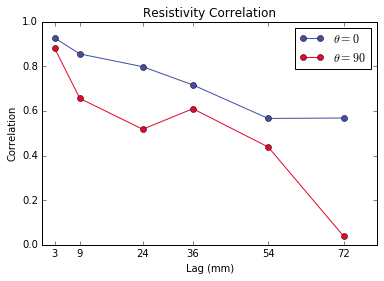

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lags[1:], horizontal_corr,"o-", color=niceblu, label=r'$\theta = 0$')
ax.plot(lags[1:], vertical_corr,"o-", color=nicered, label=r'$\theta = 90$')
plt.xticks(lags[1:])
plt.legend()
ax.set_xlabel("Lag (mm)")
ax.set_ylabel("Correlation")
ax.set_title("Resistivity Correlation", fontsize=12)
plt.hold

**4) Is resistivity more correlated in the horizontal direction or the vertical direction? What would be your estimate of the extent of the spatial correlation in each direction (i.e., the distance where there is no more correlation)?**

Resistivity is more correlated in the horizontal distance. Even at 72 mm, there is some spatial correlation in the horizontal direction. However, in the vertical direction, at 72 mm there is no more correlation.

<function matplotlib.pyplot.hold>

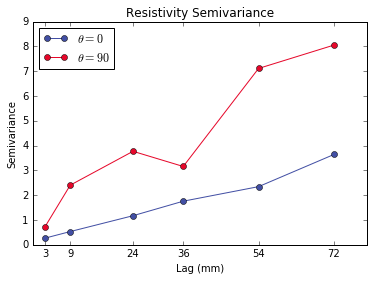

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lags[1:], horizontal_semi,"o-", color=niceblu, label=r'$\theta = 0$')
ax.plot(lags[1:], vertical_semi,"o-", color=nicered, label=r'$\theta = 90$')
plt.xticks(lags[1:])
plt.legend(loc=2)
ax.set_xlabel("Lag (mm)")
ax.set_ylabel("Semivariance")
ax.set_title("Resistivity Semivariance", fontsize=12)
plt.hold